In [2]:
# some numerical and graphical packages imported and graphical features adjusted
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib
import numpy as np
sb.set_context("talk", font_scale=1.8)
sb.set_style("whitegrid", {"grid.linewidth": .3,'grid.color': " .95"})
sb.set_style("whitegrid", {"grid.linewidth": .3,'grid.color': " .95"})
matplotlib.rc('font', family='FreeSerif') 

<h1 align='center'> Python with jupyter notebook</h1>
<h2 align='center'> A short Introduction </h2>
<h3 align='center'>Theodor Bughici </h3>

<img src = 'files/images/jBli3.png', width=150, height=150 >    <img src = 'files/images/jupyter.jpeg',width=150, height=150>

# We will go through:

## * The Jupyter notebook environment
## * Basic python variables and data types 
## * Get to Know the pandas package for data analysis
## * See some nice plotting capabilities
## * Solve the 'coffee cooling problem'  with python (If we have time)

In order to start install anaconda go to:

https://www.continuum.io/downloads 

Anaconda is a completely free Python distribution. It includes more than 300 of the most popular Python packages for science, math, engineering, and data analysis.

With Anaconda comes a MATLAB-like IDE called Spyder

<img src = 'files/images/images.duckduckgo.com.png'>

<h1 align='center'> The coffee cooling problem </h1>



Suppose you get a cup of coffee at a coffee shop. Should you mix the cream into
the coffee at the shop or wait until you reach your office?

<img src = 'files/images/images.duckduckgo.com.jpeg'>

## Newton's cooling law
## $\fbox{$\frac{dT}{dt} = -r\Delta T$}$

In [3]:
import sympy as sym

# define our symbolic variables
x, r, Tenv, T0, t = sym.symbols('x r Tenv T0 t')

# define a function
T = sym.Function('T')

# define equation
eq = sym.diff(T(t),t) + r*(T(t)-Tenv)
# solve equation
sym.dsolve(eq, T(t))

T(t) == C1*exp(-r*t) + Tenv

After pluging T(0) = 0 we get:

 $\fbox{$T(t) = (T_0-T_{env})e^{-rt} +T_{env}$}$

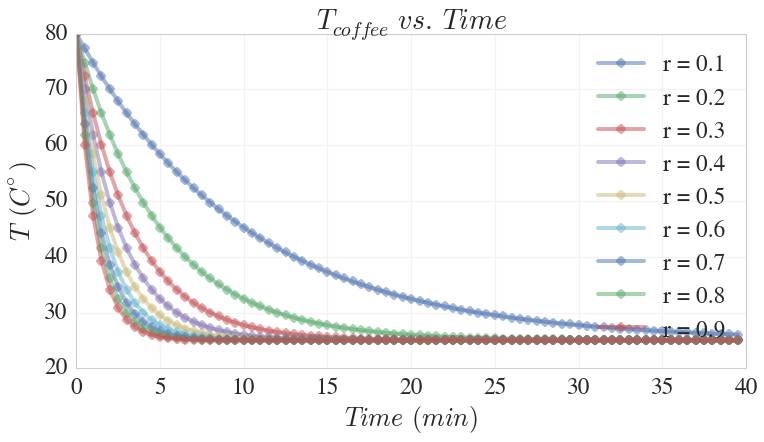

In [4]:
import numpy as np

# now we'll define the function
def cooling_law(T0, Tenv, r, t):
    return (T0-Tenv)*np.exp(-r*t) +Tenv

# set time and Temperatures
time = np.arange(0, 40, 0.5)

#plot
fig, ax = plt.subplots(figsize = (12,6))
ax.hold('On')

for r in np.arange(0.1, 1.0, 0.1):
    T = cooling_law(T0=80, Tenv=25.0, r=r, t=time)
    ax.plot(time,T,'-o', label='r = '+ str(r), linewidth=4, alpha=0.5)
ax.set_ylabel('$T\,(C^{\circ})$')
ax.set_xlabel('$Time\,(min)$')
ax.set_title('$T_{coffee}\,vs.\,Time$')
ax.legend()

In [5]:
import plotly.plotly as py
py.sign_in('theodorbugi', '21j3ggpi98')
ax.legend_.remove()
py.iplot_mpl(fig, filename= 'coffee1')

/home/theodor/anaconda/lib/python2.7/site-packages/plotly-1.8.6-py2.7.egg/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



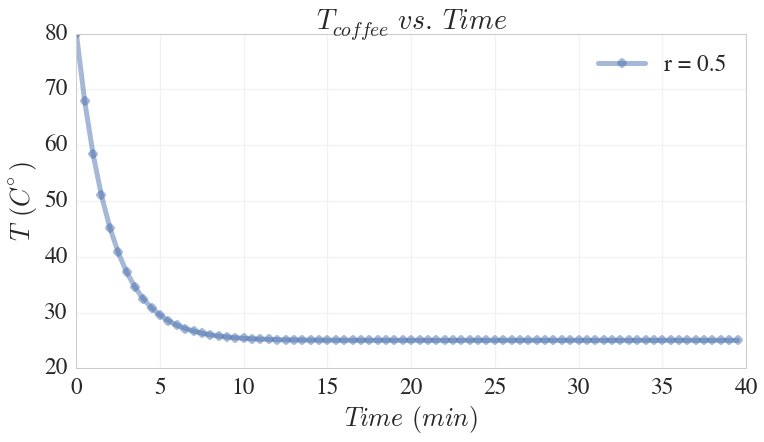

In [6]:
from IPython.html import widgets

def print_r(r_):
    print r_
    
def plot_T(r_):
    T = cooling_law(T0=80.0, Tenv=25.0, r=r_, t=time)
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    ax.plot(time,T,'-o', label='r = '+ str(r_), linewidth=5, alpha=0.5)
    ax.set_ylabel('$T\,(C^{\circ})$')
    ax.set_xlabel('$Time\,(min)$')
    ax.set_title('$T_{coffee}\,vs.\,Time$')
#     ax.text(10,60, '$r\, =\, $'+str(r_), size=32, color='b', fontweight='bold')
    ax.legend()
    
cc = widgets.interact(plot_T, r_=(0.1,0.9,0.1))


## The temperature of the mixture is the average of the temperature of the two liquids weighted by volume


## $\fbox{$T_{mixed}=\frac{T_1 v_1+T_2 v_2}{v_1+v_2} $}$


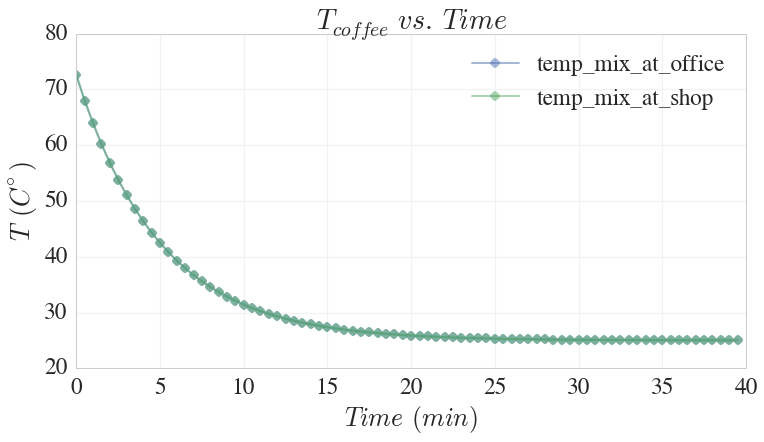

In [7]:
# temperature of the coffee mix
def temp_mixture(t1, v1, t2, v2):
    return (t1 * v1 + t2 * v2) / (v1 + v2)

temp_coffee0 = 95.0
temp_cream0  = 5.0
Tenv = 25.0
vol_coffee = 3
vol_cream = 1
r = 0.2

# mix at shop
initial_temp_mix_at_shop = temp_mixture(temp_coffee0, vol_coffee, temp_cream0, vol_cream)
temp_mix_at_shop = cooling_law(T0=initial_temp_mix_at_shop, Tenv = Tenv,r=r ,t=time)

# mix_at_office (mix after coffee chilled and cream warmed)

temp_cream  = cooling_law(T0= temp_cream0, Tenv = Tenv,r=r ,t=time) 
temp_coffee = cooling_law(T0= temp_coffee0, Tenv = Tenv,r=r ,t=time)
temp_mix_at_office = temp_mixture(temp_cream, vol_cream, temp_coffee, vol_coffee)

# plot
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
ax.hold('On')

ax.plot(time,temp_mix_at_office,'-o', label='temp_mix_at_office', linewidth=2, alpha=0.5)
ax.plot(time,temp_mix_at_shop,'-o', label='temp_mix_at_shop', linewidth=2, alpha=0.5)

ax.set_ylabel('$T\,(C^{\circ})$')
ax.set_xlabel('$Time\,(min)$')
ax.set_title('$T_{coffee}\,vs.\,Time$')
ax.legend()


<img src = 'files/images/pandas_logo.png', width=600, height=600 >

<h2 align='center'>Python Data Analysis Library </h2>

In [8]:
import pandas as pd

'''
titanic Passenchers Data
'''
url = '/home/theodor/Dropbox/PhD/IPython_Codes/data/titanic3.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


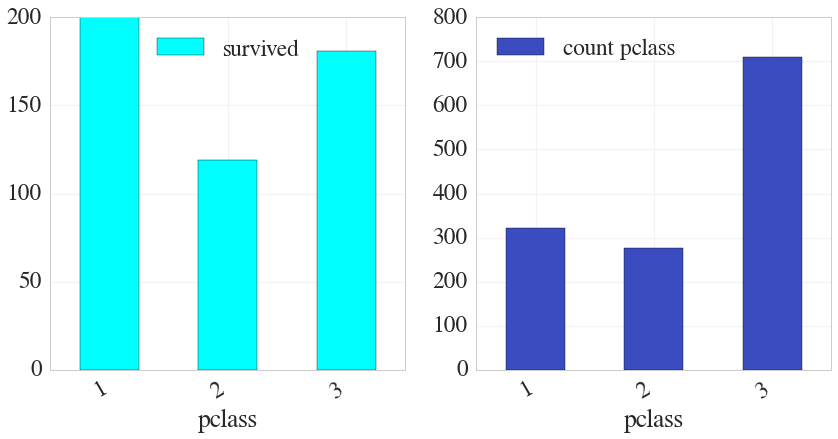

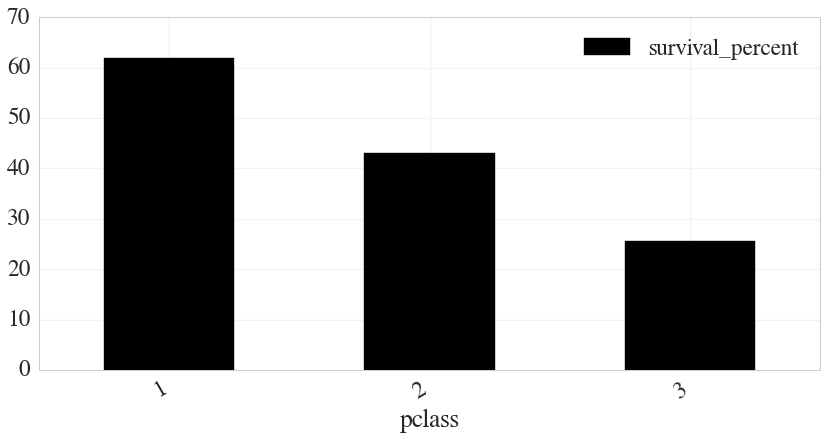

In [9]:
#  SURVIVAL BY CLASS

survived = titanic_df.groupby(['pclass'])['survived'].sum()
count = titanic_df.groupby(['pclass'])['pclass'].count()

fig, ax = plt.subplots(1,2, figsize=(14,7))
survived.plot(ax = ax[0], kind='bar', label = 'survived', colormap='cool',legend=True)
count.plot(ax= ax[1], kind='bar',label='count pclass', colormap='coolwarm',legend=True)
fig.autofmt_xdate()

survival_percent = 100*survived/count

fig, ax = plt.subplots(figsize=(14,7))
survival_percent.plot( kind='bar', label = 'survival_percent', colormap='bone',legend=True)
fig.autofmt_xdate()

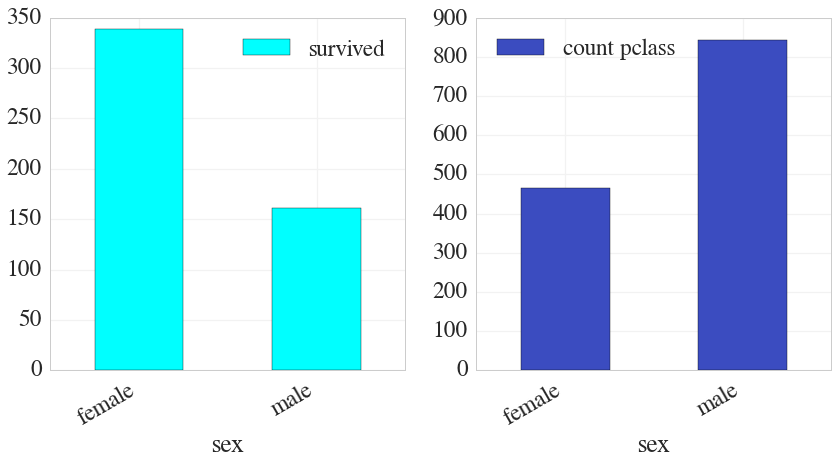

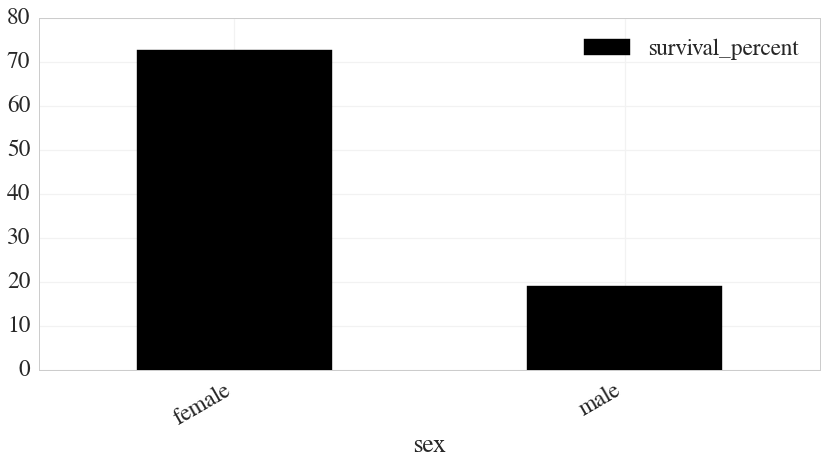

In [10]:
#  SURVIVAL BY GENDER

survived = titanic_df.groupby(['sex'])['survived'].sum()
count = titanic_df.groupby(['sex'])['sex'].count()

fig, ax = plt.subplots(1,2, figsize=(14,7))
survived.plot(ax = ax[0], kind='bar', label = 'survived', colormap='cool',legend=True)
count.plot(ax= ax[1], kind='bar',label='count pclass', colormap='coolwarm',legend=True)
fig.autofmt_xdate()

survival_percent = 100*survived/count

fig, ax = plt.subplots(figsize=(14,7))
survival_percent.plot( kind='bar', label = 'survival_percent', colormap='bone',legend=True)
fig.autofmt_xdate()

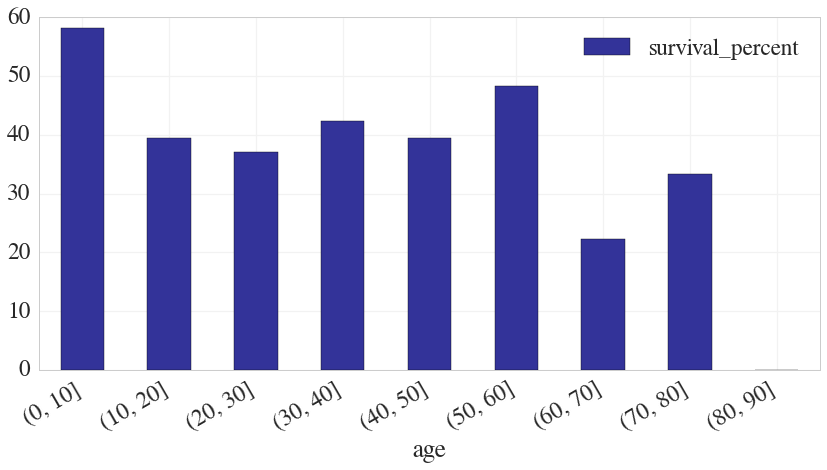

In [11]:
#  SURVIVAL BY AGE

survived = titanic_df.groupby(pd.cut(titanic_df['age'], np.arange(0,100,10)))['survived'].sum()
count = titanic_df.groupby(pd.cut(titanic_df['age'], np.arange(0,100,10)))['survived'].count()

survival_percent = 100*survived/count
fig, ax = plt.subplots( figsize=(14,7))
survival_percent.plot(kind='bar', label = 'survival_percent', colormap='terrain',legend=True)
fig.autofmt_xdate()


<h1 align=center> Plotting Options </h1>
$\alpha$

<h1 align=center>     </h1>

<img src = 'files/images/logo2.png'>

## Displaying text on plots


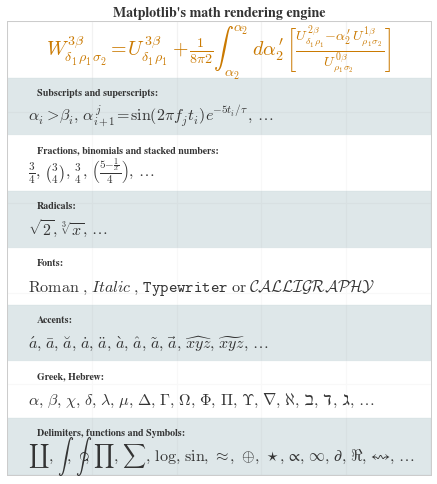

In [12]:


# from __future__ import print_function
# import matplotlib.pyplot as plt
import os
import sys
import re
import gc

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\ "
    r"\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ "
    r"\ldots$",

    2: r"$\frac{3}{4},\ \binom{3}{4},\ \stackrel{3}{4},\ "
    r"\left(\frac{5 - \frac{1}{x}}{4}\right),\ \ldots$",

    3: r"$\sqrt{2},\ \sqrt[3]{x},\ \ldots$",

    4: r"$\mathrm{Roman}\ , \ \mathit{Italic}\ , \ \mathtt{Typewriter} \ "
    r"\mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\ \bar a,\ \breve a,\ \dot a,\ \ddot a, \ \grave a, \ "
    r"\hat a,\ \tilde a,\ \vec a,\ \widehat{xyz},\ \widetilde{xyz},\ "
    r"\ldots$",

    6: r"$\alpha,\ \beta,\ \chi,\ \delta,\ \lambda,\ \mu,\ "
    r"\Delta,\ \Gamma,\ \Omega,\ \Phi,\ \Pi,\ \Upsilon,\ \nabla,\ "
    r"\aleph,\ \beth,\ \daleth,\ \gimel,\ \ldots$",

    7: r"$\coprod,\ \int,\ \oint,\ \prod,\ \sum,\ "
    r"\log,\ \sin,\ \approx,\ \oplus,\ \star,\ \varpropto,\ "
    r"\infty,\ \partial,\ \Re,\ \leftrightsquigarrow, \ \ldots$"}


def doall():
    # Colors used in mpl online documentation.
    mpl_blue_rvb = (191./255., 209./256., 212./255.)
    mpl_orange_rvb = (202/255., 121/256., 0./255.)
    mpl_grey_rvb = (51./255., 51./255., 51./255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 7))
    plt.axes([0.01, 0.01, 0.98, 0.90], axisbg="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59*line_axesfrac),
                 xycoords='data', color=mpl_orange_rvb, ha='center',
                 fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1. - (i_line)*line_axesfrac
        baseline_next = baseline - line_axesfrac*1.
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75*line_axesfrac),
                     xycoords='data', color=mpl_grey_rvb,
                     fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
#         print(i, s)
    plt.show()

if '--latex' in sys.argv:
    # Run: python mathtext_examples.py --latex
    # Need amsmath and amssymb packages.
    fd = open("mathtext_examples.ltx", "w")
    fd.write("\\documentclass{article}\n")
    fd.write("\\usepackage{amsmath, amssymb}\n")
    fd.write("\\begin{document}\n")
    fd.write("\\begin{enumerate}\n")

    for i in range(n_lines):
        s = mathext_demos[i]
        s = re.sub(r"(?<!\\)\$", "$$", s)
        fd.write("\\item %s\n" % s)

    fd.write("\\end{enumerate}\n")
    fd.write("\\end{document}\n")
    fd.close()

    os.system("pdflatex mathtext_examples.ltx")
else:
    doall()

## Contour Plots

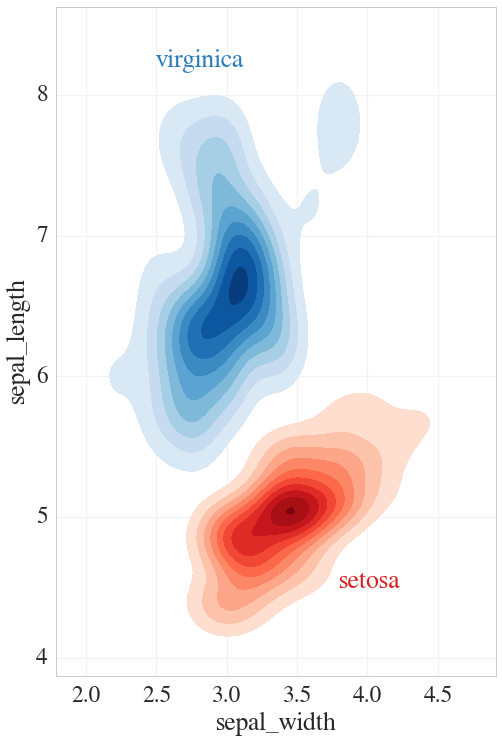

In [13]:
# sb.set(style="darkgrid")
iris = sb.load_dataset("iris")

# Subset the iris dataset by species
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")

# Set up the figure
f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")

# Draw the two density plots
ax = sb.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sb.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)

# Add labels to the plot
red = sb.color_palette("Reds")[-2]
blue = sb.color_palette("Blues")[-2]
ax.text(2.5, 8.2, "virginica", size=26, color=blue)
ax.text(3.8, 4.5, "setosa", size=26, color=red)

## Multiple linear regression

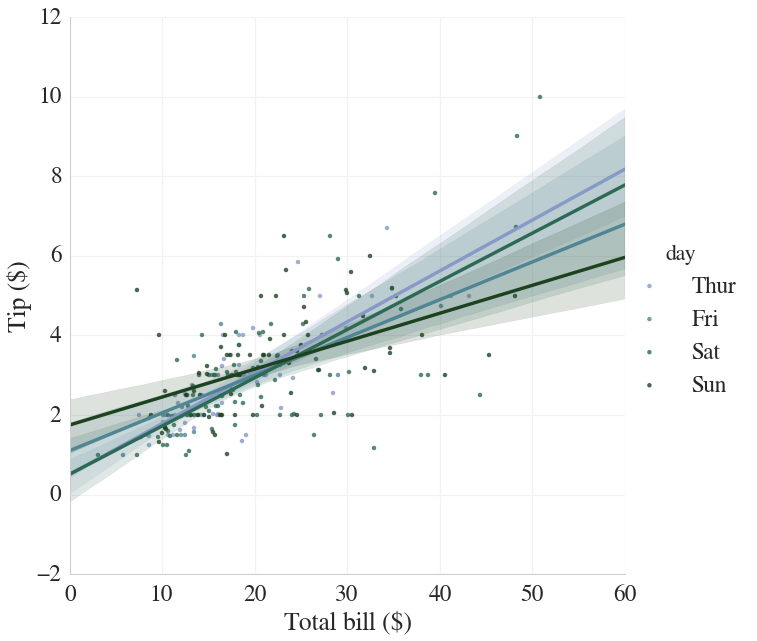

In [14]:
# Load the example tips dataset
tips = sb.load_dataset("tips")

# Make a custom sequential palette using the cubehelix system
pal = sb.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)

# Plot tip as a function of toal bill across days
g = sb.lmplot(x="total_bill", y="tip", hue="day", data=tips,
               palette=pal, size=9)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Total bill ($)", "Tip ($)")

## 3D plots

(-100, 100)

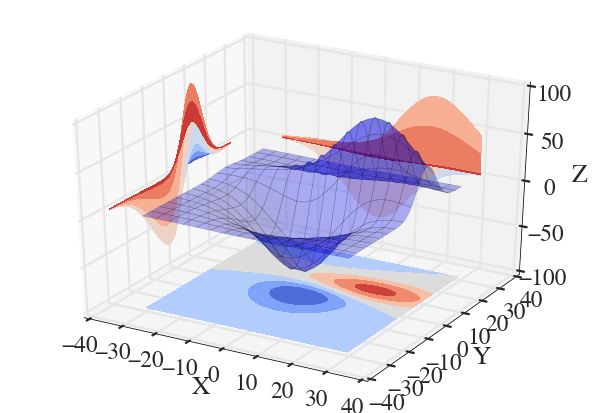

In [15]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

## Box Plots

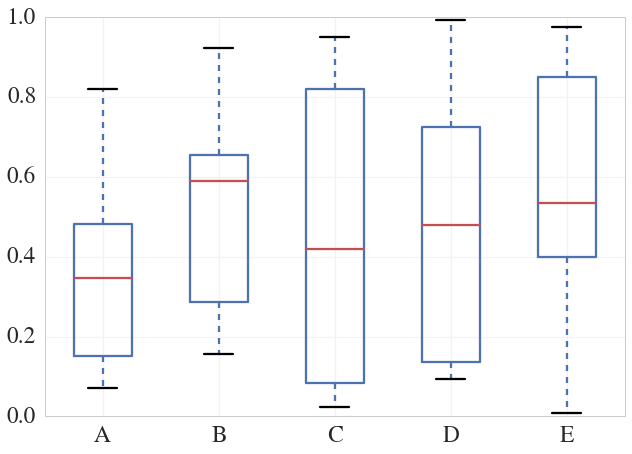

In [16]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

df.plot(kind='box')

# Many book and tutorials available!

<img src = 'files/images/Screenshot from 2015-11-14 10:35:01.png'>